In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

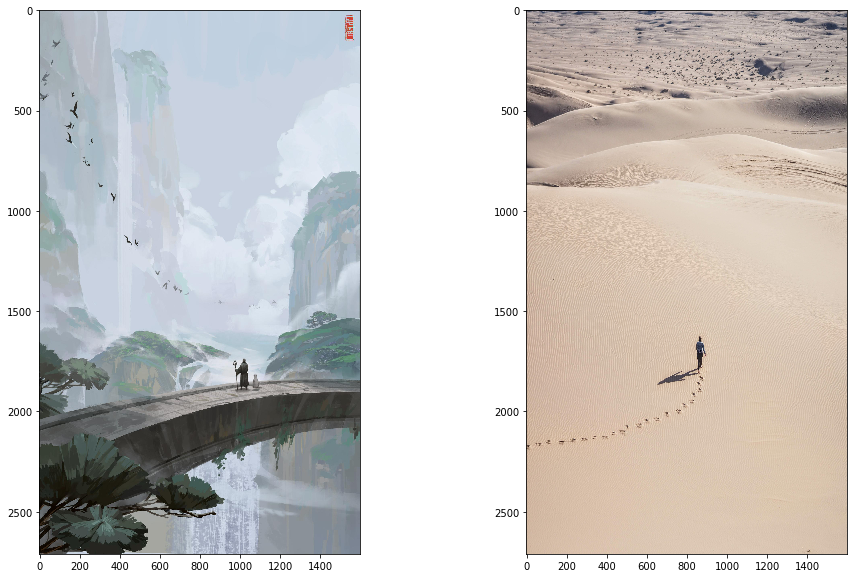

In [2]:
img_path_1 = './img2.jpg'
img_1 = cv2.imread(img_path_1)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

img_path_2 = './img3.jpg'
img_2 = cv2.imread(img_path_2)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_2 = cv2.resize(img_2, (img_1.shape[1], img_1.shape[0]))

fig, ax = plt.subplots(1, 2, figsize=[16, 10])
# ax.set_axis_off()
ax[0].imshow(img_1)
ax[1].imshow(img_2)
plt.show()

## cv2.add
### 在uint8范围内，numpy和opencv的加法操作是一样的，当值超过255时opencv和numpy的处理方式不同

In [3]:
# opencv的加法是一种饱和操作，numpy的加法是一种模操作

x = np.uint8([250])
y = np.uint8([10])

print(f'opencv 250 + 10: {cv2.add(x, y)}')  # = clip(250 + 10, 0, 255) = 255
print(f'numpy 250 + 10: {x + y}')  # = (250 + 10) % 256 = 4

opencv 250 + 10: [[255]]
numpy 250 + 10: [4]


## cv2.addWeighted$$ dst=\alpha \times img_1 + \beta \times img_2 + \gamma$$


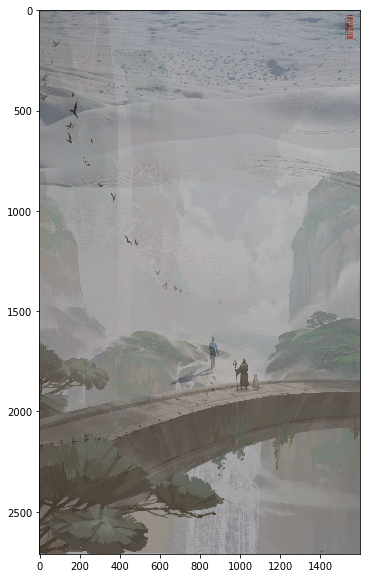

In [4]:
dst = cv2.addWeighted(src1=img_1, alpha=0.5, src2=img_2, beta=0.3, gamma=0)

fig, ax = plt.subplots(1, figsize=[16, 10])
# ax.set_axis_off()
ax.imshow(dst)
plt.show()

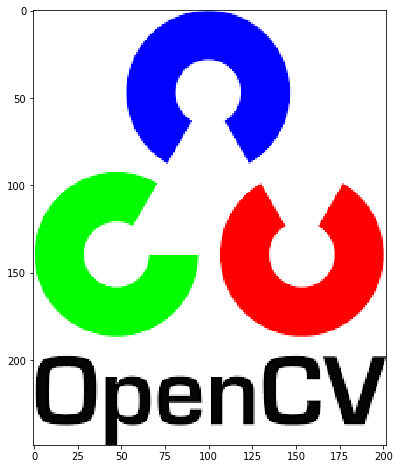

In [5]:
opencv = cv2.imread('./opencv_white.jpg')

fig, ax = plt.subplots(1, figsize=[8, 8])
# ax.set_axis_off()
ax.imshow(opencv)
plt.show()

## cv2.threshold (src, thresh, maxval, type)
#### inputs：
源图片, 阈值, 填充色（表示是高于（低于）阈值时赋予的新值）, 阈值类型
##### 阈值类型：
+ cv2.THRESH_BINARY（黑白二值）
+ cv2.THRESH_BINARY_INV（黑白二值反转）
+ cv2.THRESH_TRUNC （得到的图像为多像素值）
+ cv2.THRESH_TOZERO
+ cv2.THRESH_TOZERO_INV 

#### outputs：
该函数有两个返回值，第一个retVal（得到的阈值），第二个就是阈值化后的图像。 

Text(0.5, 1.0, 'gray')

Text(0.5, 1.0, 'binary')

Text(0.5, 1.0, 'binary_inv')

Text(0.5, 1.0, 'tunc')

Text(0.5, 1.0, 'tozero')

Text(0.5, 1.0, 'tozero_inv')

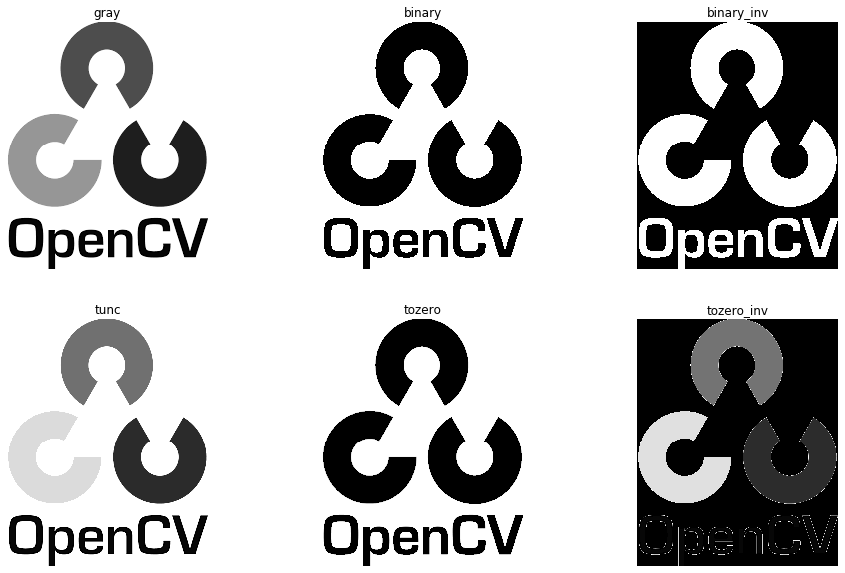

In [6]:
# 将opencv logo放到img_1的左上角

h, w, c = opencv.shape
roi = img_1[0:h, 0:w, :]

opencv_gray = cv2.cvtColor(opencv, cv2.COLOR_BGR2GRAY)
# 对于BINARY方法，当图像中的灰度值大于175的重置像素值为255,小于175的像素置为0（背景变为纯白主体变为纯黑）
ret_binary, mask_binary = cv2.threshold(opencv_gray, thresh=175, maxval=255, type=cv2.THRESH_BINARY)
ret_binary_inv, mask_binary_inv = cv2.threshold(opencv_gray, 175, 255, cv2.THRESH_BINARY_INV)
ret_tounc, mask_tounc = cv2.threshold(opencv_gray, 175, 255, cv2.THRESH_TRUNC)
ret_tozero, mask_tozero = cv2.threshold(opencv_gray, 175, 255, cv2.THRESH_TOZERO)
ret_tozero_inv, mask_tozero_inv = cv2.threshold(opencv_gray, 175, 255, cv2.THRESH_TOZERO_INV)

names = ['gray', 'binary', 'binary_inv', 'tunc', 'tozero', 'tozero_inv']
imgs = [opencv_gray, mask_binary, mask_binary_inv, mask_tounc, mask_tozero, mask_tozero_inv]
fig, axes = plt.subplots(2, 3, figsize=[16, 10])
for ax, img, name in zip(axes.flatten(), imgs, names):
    ax.imshow(img, cmap='gray')
    ax.set_title(name)
    ax.set_axis_off()
plt.show()

In [7]:
ret_binary, ret_binary_inv, ret_tounc, ret_tozero, ret_tozero_inv

(175.0, 175.0, 175.0, 175.0, 175.0)

In [8]:
b = cv2.bitwise_not(mask_binary)
(b == mask_binary_inv).all()

True

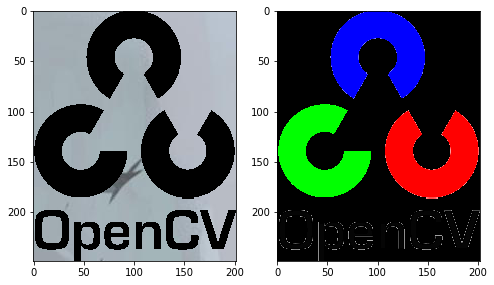

In [38]:
# cv2.bitwise_and做的事情：
#   1.将src1和src2对应像素进行and运算，输出图像
#   2.将第一步得到的输出再经过传入的mask，mask为1的位置保留像素，mask为0的位置像素置为0
test = np.ones(shape=roi.shape).astype(np.uint8) * 250
img_1_bg = cv2.bitwise_and(src1=roi, src2=roi, mask=mask_binary)
img_1_fg = cv2.bitwise_and(src1=opencv, src2=opencv, mask=mask_binary_inv)

fig, ax = plt.subplots(1, 2, figsize=[8, 8])
# ax.set_axis_off()
ax[0].imshow(img_1_bg)
ax[1].imshow(img_1_fg)
plt.show()

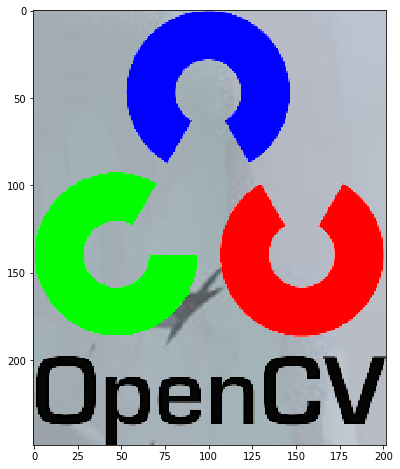

In [39]:
img_dst = cv2.add(img_1_fg, img_1_bg)
fig, ax = plt.subplots(1, figsize=[8, 8])
# ax.set_axis_off()
ax.imshow(img_dst)
plt.show()

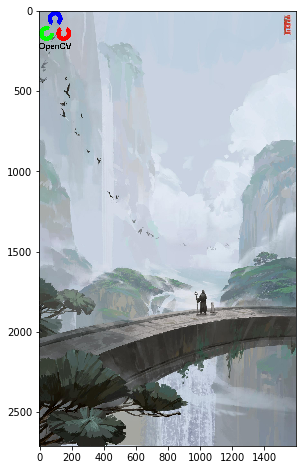

In [40]:
img_1[0:h, 0:w] = img_dst
fig, ax = plt.subplots(1, figsize=[8, 8])
# ax.set_axis_off()
ax.imshow(img_1)
plt.show()